## Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions For Investigation

**Question 1:**

What is our independent variable? What is our dependent variable?

**Answer 1:**

- Our independent variable will be the congruency of the word (congruent or incongruent). 
- The dependent variable will be the time taken to name the ink color.

**Question 2:**

What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Answer 2:**
- **Null Hypothesis ($H_0$)**: Incongruency of word will have no effect or decrease the time taken to name the ink color.
- **Alternative Hypothesis ($H_1$)**: The incongruency of word will increase the time taken to name the ink color.

$$H_0: \mu_i \le \mu_c$$
$$H_1: \mu_i > \mu_c$$

Where, 
- $\mu_i$ = Population mean of time taken to name the ink color for incongruent words
- $\mu_c$ = Population mean of time taken to name the ink color for congruent words

**Statistical Test**: *Paired one tail (positive) t-test* because both tests have been performed on the same set of users one after other. This means that both tests are dependent and paired. We will be performing one tail t-test because we are looking to compare means in one direction only. We are using t-test because population parameters are unknown. 

Assumptions:
- 95% Confidence Interval i.e. $\alpha = 0.05$


In [2]:
# Use inline plotting
%matplotlib inline

In [3]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Read dataset
df = pd.read_csv("Stroop-Dataset.csv")

In [5]:
# View the dataset
df.head(5)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [6]:
# Print dataset description
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [7]:
# Calculate median of values
print("Median for congruent: {}".format(df['Congruent'].median()))
print("Median for incongruent: {}".format(df['Incongruent'].median()))

Median for congruent: 14.3565
Median for incongruent: 21.0175


**Question 3**

Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

**Answer 3**

*Central Tendency*
- **Mean**: Congruent = 14.05, Incongruent = 22.01
- **Median**: Congruent = 14.3565, Incongruent = 21.0175

*Variability*
- **Standard deviation**: Congruent = 3.559, Incongruent = 4.797

**Question 4**

Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

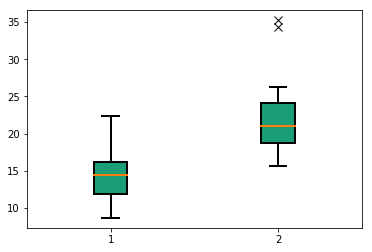

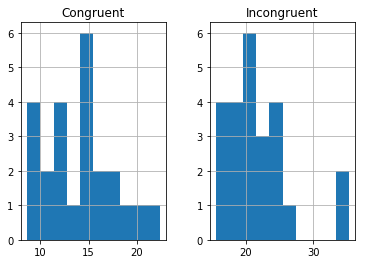

In [26]:
dataset = np.genfromtxt('Stroop-Dataset.csv', delimiter=',',dtype=np.float32)
dataset=np.delete(dataset,(0),axis=0)
plot = plt.boxplot(dataset,vert=True,widths = 0.2,patch_artist=True)

plt.setp(plot['boxes'], linewidth=2, facecolor='#1b9e77')
plt.setp(plot['whiskers'], linewidth=2) 
plt.setp(plot['caps'], linewidth=2)
plt.setp(plot['fliers'], marker='x', markersize=8) 
plt.setp(plot['medians'], linewidth=2)

df.hist()
plt.show()

From the **histogram**, it's clear that both distributions are slightly positively skewed. The mean in both cases is also near the peak for each peak.
From the **boxplot**, it's clear that the incongruent data has two outliers which can also increase the mean for that dataset.

**Question 5**

Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [28]:
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [29]:
df['Difference'] = df['Incongruent'] - df['Congruent']

In [30]:
df

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134
5,12.238,20.878,8.640
6,14.692,24.572,9.880
7,8.987,17.394,8.407
8,9.401,20.762,11.361
9,14.480,26.282,11.802


In [31]:
mean_difference = df['Difference'].mean()

In [32]:
mean_difference

7.964791666666667

In [36]:
standard_deviation = np.std(df['Difference'],ddof=1)

In [37]:
standard_deviation

4.864826910359056

In [38]:
standard_error = standard_deviation/np.sqrt(len(df['Difference']))

In [39]:
standard_error

0.9930286347783406

In [40]:
t_statistic = mean_difference/standard_error

In [41]:
t_statistic

8.020706944109957

In [42]:
# t_critical value at degree of freedom (24-1 = 23) = 1.714

Results are as follows:

- **Mean difference** = 7.965
- **Standard deviation** = 4.865 (corrected)
- **Standard error** = 0.993
- **t statistic** = 8.021
- **t critical** = 1.714
- **p value** < 0.0001 => **Result is significant** (since the p-value is less than 0.05)

Thus, the null hypothesis is **rejected**.

**Question 6**

What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Answer 6**

The lower time for congruent words maybe because of the habitual behavior. One part of the brain can recognize the color and the other can recognize the word. When both the results are same, it takes lesser time to give the result as no further correction is required (which is necessary in case of incongruent words).

A similar task can be a task where words are jumbled in such a manner that the first and last letters stay at the same place and users are asked to write them. In most cases, one can recognize the word if it's very familiar to him/her but while typing it, they will tend to write the correct spelling (because of muscle memory) and then fix it to write the given incorrect spelling. This in turn should take more time.